In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# get all the data together

directory = 'C:/Users/Acer/Desktop/Data science/1 letnik/Project/new/how-good-is-my-plot/src/'
df = pd.DataFrame(columns=['first_plot','second_plot','selected','legend','colour','axes','element_sizes','readability'])
results = ['batch_1/swiss_sys_run_1_parsed.csv', 'batch_2/swiss_sys_run_2_parsed.csv', 'batch_3/swiss_sys_run_3_parsed.csv', 'batch_4/swiss_sys_run_4_parsed.csv', 'batch_5/swiss_sys_run_5_parsed.csv', 'batch_6/swiss_sys_run_6_parsed.csv', 'batch_7/swiss_sys_run_7_parsed.csv', 'batch_8/swiss_sys_run_8_parsed.csv', 'batch_9/swiss_sys_run_9_parsed.csv']
for res in results:
    d = pd.read_csv(directory+res)
    df =  pd.concat([df, d], ignore_index=True)


In [10]:
df

,first_plot,second_plot,selected,legend,colour,axes,element_sizes,readability
0,99_frib_236305.jpeg,100_fmfm_3931.jpeg,100_fmfm_3931.jpeg,first,first,second,second,second
1,100_fmfm_4907.jpeg,100_efb_5868.jpeg,100_fmfm_4907.jpeg,second,second,first,first,first
2,100_efb_7308.jpeg,100_efb_7008.jpeg,100_efb_7308.jpeg,first,first,first,second,first
3,100_fmfb_15299.jpeg,100_efb_32864.jpeg,100_efb_32864.jpeg,NaN,NaN,second,first,second
4,99_frim_17604.jpeg,100_fmfp_2907.jpeg,100_fmfp_2907.jpeg,NaN,second,second,second,first
...,...,...,...,...,...,...,...,...
2245,100_fmfb_3017.jpeg,100_frim_645.jpeg,100_fmfb_3017.jpeg,first,NaN,NaN,first,first
2246,100_frib_70750.jpeg,100_efb_7314.jpeg,100_frib_70750.jpeg,first,first,first,first,first
2247,100_frib_182416.jpeg,100_frib_52246.jpeg,100_frib_182416.jpeg,first,NaN,NaN,first,first
2248,100_frib_199019.jpeg,100_efm_28363.jpeg,100_frib_199019.jpeg,first,NaN,first,NaN,first


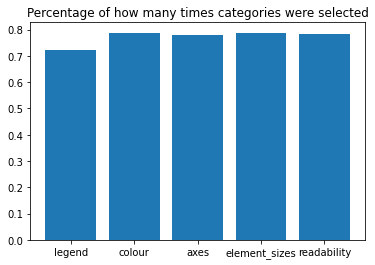

In [30]:
categories = ['legend', 'colour', 'axes', 'element_sizes', 'readability']
counts = []
for cat in categories:
    counts.append(1-df[cat].isnull().sum()/2250)
plt.bar(categories, counts)
plt.title('Percentage of how many times categories were selected')
plt.show()

In [33]:
# add column of winners as first/second
winners = []
for index, row in df.iterrows():
    selected = int(row['second_plot'] == row['selected'])
    if selected == 0:
        winners.append('first')
    else:
        winners.append('second')
df['winners'] = pd.Series(winners, index=df.index)
df

,first_plot,second_plot,selected,legend,colour,axes,element_sizes,readability,winners
0,99_frib_236305.jpeg,100_fmfm_3931.jpeg,100_fmfm_3931.jpeg,first,first,second,second,second,second
1,100_fmfm_4907.jpeg,100_efb_5868.jpeg,100_fmfm_4907.jpeg,second,second,first,first,first,first
2,100_efb_7308.jpeg,100_efb_7008.jpeg,100_efb_7308.jpeg,first,first,first,second,first,first
3,100_fmfb_15299.jpeg,100_efb_32864.jpeg,100_efb_32864.jpeg,NaN,NaN,second,first,second,second
4,99_frim_17604.jpeg,100_fmfp_2907.jpeg,100_fmfp_2907.jpeg,NaN,second,second,second,first,second
...,...,...,...,...,...,...,...,...,...
2245,100_fmfb_3017.jpeg,100_frim_645.jpeg,100_fmfb_3017.jpeg,first,NaN,NaN,first,first,first
2246,100_frib_70750.jpeg,100_efb_7314.jpeg,100_frib_70750.jpeg,first,first,first,first,first,first
2247,100_frib_182416.jpeg,100_frib_52246.jpeg,100_frib_182416.jpeg,first,NaN,NaN,first,first,first
2248,100_frib_199019.jpeg,100_efm_28363.jpeg,100_frib_199019.jpeg,first,NaN,first,NaN,first,first


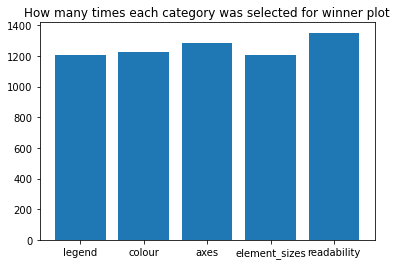

In [226]:
winner_cat_count = []
win_row = df['winners']
for cat in categories:
    cat_row = df[cat]
    count = 0
    for i in range(2250):
        count += int((win_row[i] == cat_row[i]) and (not pd.isnull(cat_row[i])))
    winner_cat_count.append(count)

plt.bar(categories, winner_cat_count)
plt.title('How many times each category was selected for winner plot')
plt.show()
    

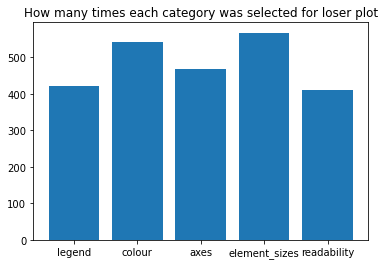

In [225]:
loser_cat_count = []
win_row = df['winners']
for cat in categories:
    cat_row = df[cat]
    count = 0
    for i in range(2250):
        count += int((win_row[i] != cat_row[i]) and (not pd.isnull(cat_row[i])) )
    loser_cat_count.append(count)

plt.bar(categories, loser_cat_count)
plt.title('How many times each category was selected for loser plot')
plt.show()

<AxesSubplot:>

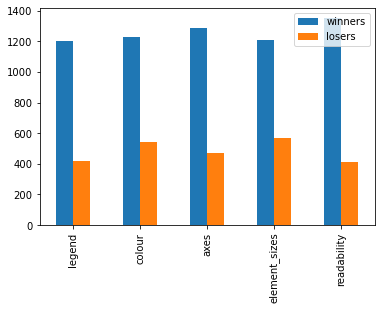

In [227]:
df_cat_count = pd.DataFrame(columns=categories)
df_cat_count.loc[0] = winner_cat_count
df_cat_count.loc[1] = loser_cat_count

df_cat_count = df_cat_count.transpose()
df_cat_count.columns=['winners', 'losers']

df_cat_count.plot(kind='bar')

In [264]:
df_num = df[categories+['winners']]
df_num = df_num.applymap(lambda x: -1 if x == 'first' else (1 if x == 'second' else 0))

In [389]:
# correlations between categories and winer
corr_with_winners = []
for cat in categories:
    cor = df_num['winners'].corr(df_num[cat])
    corr_with_winners.append(cor)
corr_with_winners

[0.3922047496389462,
 0.3078052083190671,
 0.35305708777880457,
 0.2765810734535024,
 0.44553864484565797]

Text(0.5, 1.0, 'Correlations with winners')

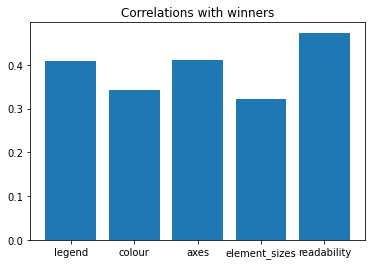

In [266]:
plt.bar(categories, corr_with_winners)
plt.title('Correlations with winners')

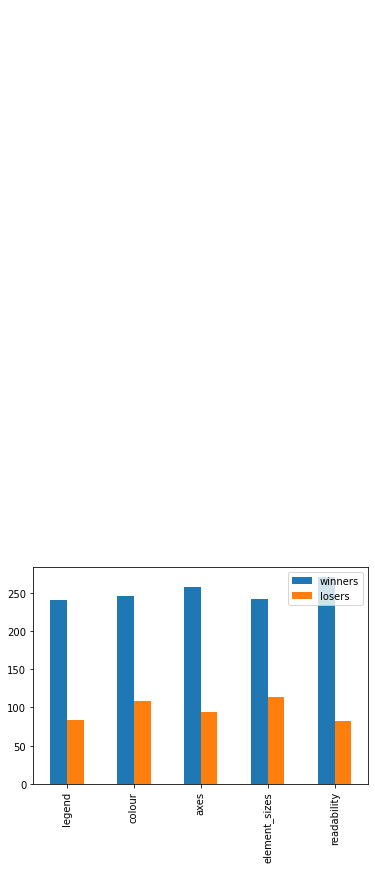

In [267]:
df_cat_count.plot(kind='bar')
for i, cat in enumerate(categories):
    plt.annotate(round(corr_with_winners[i],2), (i, 1000),fontsize=15)

In [268]:
# normalize the points in each row
points = []
for i, row in df_num.iterrows():
    points.append(sum(abs(row[categories])))
df_num['points'] = points
df_num

,legend,colour,axes,element_sizes,readability,winners,points
0,-1,-1,1,1,1,1,5
1,1,1,-1,-1,-1,-1,5
2,-1,-1,-1,1,-1,-1,5
3,0,0,1,-1,1,1,3
4,0,1,1,1,-1,1,4
...,...,...,...,...,...,...,...
2245,-1,0,0,-1,-1,-1,3
2246,-1,-1,-1,-1,-1,-1,5
2247,-1,0,0,-1,-1,-1,3
2248,-1,0,-1,0,-1,-1,3


In [269]:
dft = df_num
for i, row in dft.iterrows():
    new = []
    for cat in categories:
        val = int(row[cat])
        new.append(val/row['points'])
    new.append(row['winners'])
    new.append(row['points'])
    dft.iloc[i] = new
dft

,legend,colour,axes,element_sizes,readability,winners,points
0,-0.200000,-0.20,0.200000,0.200000,0.200000,1,5
1,0.200000,0.20,-0.200000,-0.200000,-0.200000,-1,5
2,-0.200000,-0.20,-0.200000,0.200000,-0.200000,-1,5
3,0.000000,0.00,0.333333,-0.333333,0.333333,1,3
4,0.000000,0.25,0.250000,0.250000,-0.250000,1,4
...,...,...,...,...,...,...,...
2245,-0.333333,0.00,0.000000,-0.333333,-0.333333,-1,3
2246,-0.200000,-0.20,-0.200000,-0.200000,-0.200000,-1,5
2247,-0.333333,0.00,0.000000,-0.333333,-0.333333,-1,3
2248,-0.333333,0.00,-0.333333,0.000000,-0.333333,-1,3


SAME ANALISIS JUST WITH NORMALIZED POINTS

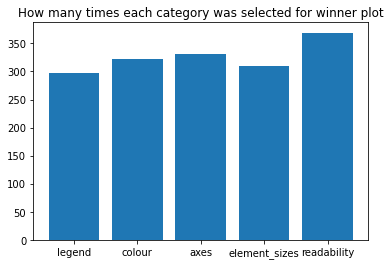

In [270]:
winner_cat_count = []
win_row = dft['winners']
for cat in categories:
    cat_row = dft[cat]
    count = 0
    for i in range(2250):
        if win_row[i] > 0 and cat_row[i] > 0:
            count += cat_row[i]
        elif win_row[i] < 0 and cat_row[i] < 0:
            count += abs(cat_row[i])
    winner_cat_count.append(count)

plt.bar(categories, winner_cat_count)
plt.title('How many times each category was selected for winner plot')
plt.show()

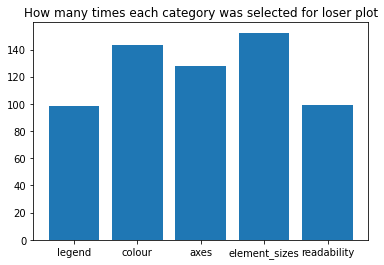

In [271]:
loser_cat_count = []
win_row = dft['winners']
for cat in categories:
    cat_row = dft[cat]
    count = 0
    for i in range(2250):
        if win_row[i] < 0 and cat_row[i] > 0:
            count += cat_row[i]
        elif win_row[i] > 0 and cat_row[i] < 0:
            count += abs(cat_row[i])
    loser_cat_count.append(count)

plt.bar(categories, loser_cat_count)
plt.title('How many times each category was selected for loser plot')
plt.show()

<AxesSubplot:>

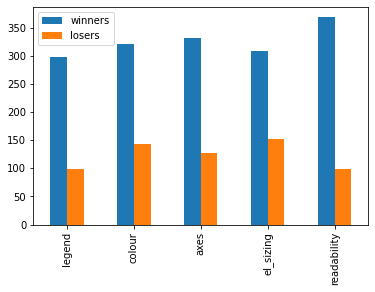

In [338]:
df_cat_count = pd.DataFrame(columns=categories)
df_cat_count.loc[0] = winner_cat_count
df_cat_count.loc[1] = loser_cat_count

df_cat_count = df_cat_count.rename(columns={'element_sizes':'el_sizing'})

df_cat_count = df_cat_count.transpose()
df_cat_count.columns=['winners', 'losers']

df_cat_count.plot(kind='bar')

In [339]:
corr_with_winners = []
for cat in categories:
    cor = dft['winners'].corr(dft[cat])
    corr_with_winners.append(cor)
corr_with_winners

[0.3922047496389462,
 0.3078052083190671,
 0.35305708777880457,
 0.2765810734535024,
 0.44553864484565797]

In [390]:
# correlations between categories
dft[categories].corr()

,legend,colour,axes,element_sizes,readability
legend,1.000000,0.067207,0.177962,0.142127,0.230197
colour,0.067207,1.000000,-0.029137,0.061506,0.171806
axes,0.177962,-0.029137,1.000000,-0.009508,0.175550
element_sizes,0.142127,0.061506,-0.009508,1.000000,0.157839
readability,0.230197,0.171806,0.175550,0.157839,1.000000


In [340]:
# dort the data by correlation
df_cat_count['corr'] = corr_with_winners
df_cat_count = df_cat_count.sort_values(by=['corr'], ascending=False)
df_cat_count = df_cat_count.drop(columns=['corr'])
df_cat_count

,winners,losers
readability,368.766667,99.516667
legend,297.900000,98.133333
axes,331.733333,128.133333
colour,321.316667,143.133333
el_sizing,309.083333,152.283333


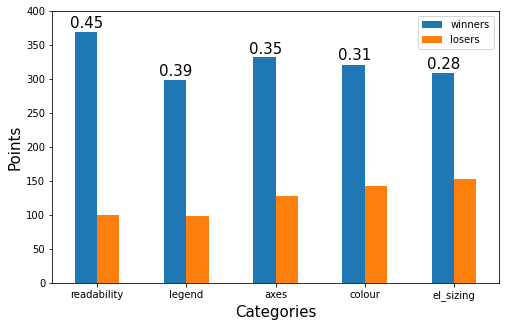

In [385]:
df_cat_count.plot(kind='bar',rot=0, ylim=(0,400), figsize=(8,5))
height = [375,305,337,328,315]
corr_with_winners.sort(reverse=True)
for i, cat in enumerate(categories):
    plt.annotate(round(corr_with_winners[i],2), (i-0.3, height[i]),fontsize=15)
plt.xlabel('Categories', size=15)
plt.ylabel('Points', size = 15)
plt.savefig('categories.png')
plt.show()

In [391]:
# calculate the number of lucky winners - where plot won but had less than half categories selected
df_lw = pd.DataFrame(columns = df_num.columns)
lucky_winners = 0
for i, row in df_num.iterrows():
    count_pos = 0
    for cat in categories:
        #print(row[cat].astype(str).astype(int))
        if float(row[cat]) > 0 and row['winners'] > 0:
            #print('.')
            count_pos +=1
        elif float(row[cat]) < 0 and row['winners'] < 0:
            #print('.')
            count_pos +=1
    if count_pos < row['points']/2:
        lucky_winners+=1
        df_lw = df_lw.append(row)
lucky_winners

273

In [283]:
df_lw

,legend,colour,axes,element_sizes,readability,winners,points
16,0.200000,0.200000,-0.200000,-0.200000,-0.200000,1.0,5.0
18,0.200000,0.200000,-0.200000,-0.200000,-0.200000,1.0,5.0
55,-0.333333,0.000000,-0.333333,0.333333,0.000000,1.0,3.0
57,-0.333333,0.000000,0.333333,0.333333,0.000000,-1.0,3.0
76,0.000000,0.000000,0.000000,-1.000000,0.000000,1.0,1.0
...,...,...,...,...,...,...,...
2195,-0.200000,0.200000,-0.200000,0.200000,0.200000,-1.0,5.0
2204,-0.333333,0.000000,-0.333333,0.000000,-0.333333,1.0,3.0
2207,0.000000,-0.333333,-0.333333,0.000000,-0.333333,1.0,3.0
2220,-0.200000,0.200000,-0.200000,0.200000,0.200000,-1.0,5.0


In [392]:
# count of categories for lucky winners
counts = []
for cat in categories:
    c = 0
    for i, row in df_lw.iterrows():
        if row['winners'] > 0 and row[cat]<0:
            c+=abs(row[cat])
        elif row['winners'] < 0 and row[cat]>0:
            c+=abs(row[cat])
    counts.append(c)

<BarContainer object of 5 artists>

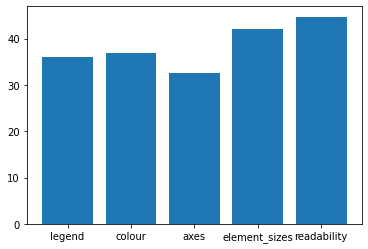

In [292]:
plt.bar(categories, counts)